# SUNBURST CHART

-------------------------------------------------------------------------------------------------------------------

In [42]:
#!/usr/bin/env python3
# coding: utf-8

# color pallet greens https://coolors.co/34463e-a4c3b2-cce3de-eaf4f4-f6fff8
# color pallet secondary https://coolors.co/353535-3c6e71-ffffff-d9d9d9-284b63

import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import os
import datetime
from colour import Color
from colr import color
import plotly.express as px

#Orca must be installed?
#conda install -c plotly plotly-orca
#Kaleido is for exporting images from plotly
#pip install -U kaleido

In [43]:
def show_svg(filename):
    from IPython.display import SVG, display
    display(SVG(filename=f'{filename}.svg'))

In [44]:
# data_df = pd.read_csv('sample_data_month_categories.csv')
data_df = pd.read_csv('../data/test/sample_data_month_categories.csv')

In [45]:
rainbow_colors = ['#F94144', '#f3722c', '#F9844A', '#f8961e', '#F9C74F', '#90BE6D', '#43AA8B', '#4D908E', '#277DA1', '#577590']
print(len(rainbow_colors))

10


In [46]:
red_orange = ['#F94144' ,'#F94A40', '#F9543C', '#F95D37', '#F96733', '#F8702F', '#F87A2B', '#F88326', '#F88D22', '#F8961E']
orange_yellow = ['#F89B23', '#F8A129', '#F8A62E', '#F8AC34', '#F9B139', '#F9B73F', '#F9BC44', '#F9C24A', '#F9C74F']
yellow_green = ['#EDC652', '#E2C556','#D6C459', '#CAC35C', '#BFC260', '#B3C163', '#A7C066', '#9CBF6A', '#90BE6D',]
green_cyan = ['#88BC70', '#87BC70', '#7FBA74', '#76B777', '#6EB57A', '#65B37E','#55B082', '#54AE84', '#4CAC88']
cyan_deepcyan = ['#43AA8B', '#44A78B', '#45A48C', '#479E8C', '#499C8D', '#4A998D', '#4B968D', '#4C968D', '#4D908E']
deepcyan_blue = ['#498E90','#458C92', '#408A94', '#3C8896', '#388599', '#34839B', '#2F819D', '#2B7F9F', '#277DA1']
blue_darkblue = ['#2C7C9F', '#327B9D', '#377A9B', '#3C7999', '#427998', '#477896', '#4C7794', '#527692', '#577590']

gradient = red_orange + orange_yellow + yellow_green + green_cyan + cyan_deepcyan + deepcyan_blue + blue_darkblue
print(len(gradient))
# gradient = red_orange + orange_yellow + yellow_green + cyan_deepcyan + deepcyan_blue + blue_darkblue
# print(len(gradient))

64


 |   |   |   |   |   | |||
|---|---|---|---|---|---|---|---|
 | **parent**       | **type**         | **priority**     | **fixed/variable** | **one-time/re-occuring** | **identifier**    | **amount**  | **date**    | **transaction**                   |
 | health       |life insurance| essential    | fixed          | re-occuring          | 'AAA Insurance| -50     | 01/22/21| AAA INSURANCE PAYMENT 48684   |
 | entertainment|movies        | non-essential| variable       | one-time             | 'REGAL'       | -15     | 01/12/21| CINEMA REGAL PARK WEST VA 1588|


In [47]:
# Thinking about adding another column based on this data
# dataframe might look good like
# where parent = budget category
# | parent       | type         | priority     | fixed/variable | one-time/re-occuring | identifier    | amount  | date    | transaction                   |
# | health       |life insurance| essential    | fixed          | re-occuring          | 'AAA Insurance'| -50     | 01/22/21| AAA INSURANCE PAYMENT 48684   |
# | entertainment|movies        | non-essential| variable       | one-time             | 'REGAL'       | -15     | 01/12/21| CINEMA REGAL PARK WEST VA 1588|

fixed = {
    'debt':['car loan', 'student loan/tution'],
    'housing':['home owners insurance', 'renters insurance', 'rent', 'mortgage', 'property taxes'],
    'utilities':['cable', 'internet', 'garbage'],
    'medical':['health insurance'],
    'childcare':['daycare', 'child support'],
    'entertainment':['streaming services']
}

variable = {
    'utilities':['water', 'electricity', 'gas', 'phone']
}

essentials = {
    'savings' : ['life insurance', 'emergency fund', 'ROTH IRA', '401(k)', 'college fund', 'mad money'],
    'debt' : ['credit card', 'car loan', 'student loan', 'tuition', 'pay day loan', 'other' ],
    'domicile' : ['home', 'renters insurance', 'home insurance', 'rent', 'mortgage', 'repair', 'maitenance', 'furnishings', 'property taxes', 'yard', 'cleaning supply', 'kitchen ware','tools'],
    'transportation' : ['car insurance','maintenance', 'gas' 'bus', 'subway', 'train', 'ferry fare'],
    'food' : ['groceries'],
    'utilities' : ['phone', 'cable', 'internet', 'water', 'gas', 'electricity', 'garbage', 'utility'], #oil, wood
    'medical' : ['health insurance','doctor', 'prescriptions', 'first aid supply', 'appointment'], #types of doctors, optometrist, dentist, etc
    'education' : ['supplies', 'fees', 'books'],
    'childcare' : ['daycare', 'camps', 'babysitter', 'child support'],
    'personal' : ['clothing', 'toiletries', 'grooming'],
    'work':['office supply', 'work phone', 'computer repair', 'software', 'hardware']
}

non_essentials = {
    'cravings' :['dining out', 'fast food', 'delivery', 'alcohol', 'restaurants', 'coffee'],
    'gifts' : ['birthday', 'anniversary', 'holiday', 'other'],
    'giving': ['tithing', 'charitable', 'other'],
    'pets': ['food', 'supplies', 'vet', 'prescriptions', 'appointment'],
    'entertainment': ['streaming services','games', 'movies', 'hobbies', 'vacation', 'books'],
    'personal': ['salon', 'gym', 'dry cleaning']}
    #'online':['unknown']}
#'domicile' : {'home': ['home insurance', 'mortgage', 'mortgage payment', 'home maitenance', 'home repair', 'property taxes', 'yard'],
#                'rental':['renters insurance', 'rent', 'rent payment', 'rental repair'],
#                 'furnishings':['furnishings', 'cleaning supply', 'kitchen ware','tools']},

In [48]:
## Working
#- go back to coolers.co and grab names of colors make a dictionary with the name as the key and color as value

In [49]:
# red to blue/purple
rainbow_colors = ['#F94144', '#f3722c', '#F9844A', '#f8961e', '#F9C74F', '#90BE6D', '#43AA8B', '#4D908E', '#277DA1', '#577590']

In [50]:
essentials.keys()

dict_keys(['savings', 'debt', 'domicile', 'transportation', 'food', 'utilities', 'medical', 'education', 'childcare', 'personal', 'work'])

In [51]:
priority = []
for i in data_df.category:
    if i in essentials.keys() or i in essentials.values():
        priority.append('Essential')
    elif i == 'online':
        priority.append('Unknown')
    else:
        priority.append('Non-Essential')
data_df['priority'] = priority

In [52]:
# for i in essentials.items():
#     for j in data_df.category:
#         if j in essentials_keys( )

In [53]:
data_df['percentage'] = [(i/data_df.amount.sum()*100) for i in data_df.amount]

In [54]:
data_df

,date,transaction,amount,identifier,category,priority,percentage
0,03/31/2021,"TRELLO.COM, ATLASSIAN 888-942-1573 NY",-69.99,"TRELLO.COM,",work,Essential,4.966718
1,04/05/2021,KROGER #456 MARTINSBURG NC,-229.12,KROGER,food,Essential,16.259101
2,04/05/2021,HOME DEPOT #11154 MARTINSBURG NC,-20.00,DEPOT,home,Non-Essential,1.419265
3,04/05/2021,JAPANESE RESTAURANT MARTINSBURG NC,-48.39,RESTAURANT,restaurants,Non-Essential,3.433912
4,04/06/2021,TRACTOR SUPPLY #5555 NEWARK NY,-27.50,TRACTOR,home,Non-Essential,1.951490
5,04/06/2021,WALGREENS #8885 MARTINSBURG NC,-6.86,WALGREENS,medical,Essential,0.486808
6,04/07/2021,MARY SUES VETERINARY -RICKARTON WV,-105.95,VETERINARY,pets,Non-Essential,7.518557
7,04/08/2021,Adobe Inc 888-198884354 CA,-239.00,Adobe,work,Essential,16.960218
8,04/08/2021,SQ *LEWIS GINTER GARRichmond WV,-31.84,GINTER,fun,Non-Essential,2.259470
9,04/08/2021,DOORDASH*BUFFALO WILD WWW.DOORDASH.CA,-49.00,DOORDASH,fast_food,Non-Essential,3.477200


In [55]:
# essential = data_df.loc[data_df['priority'] == 'Essential']
# essential.head()

In [56]:
# example = dict(
#     child=["Essential", "Non-Essential", "Food","Hobbies", "Restaurants", "Domicile", "Unknown", "Online", "Medical"],
#     parent=["List", "List","Essential", "Non-Essential", "Non-Essential", "Essential", "Essential", "Unknown", "Essential" ],
#     value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

In [57]:
data_df.loc[data_df['priority'] == 'Essential']

,date,transaction,amount,identifier,category,priority,percentage
0,03/31/2021,"TRELLO.COM, ATLASSIAN 888-942-1573 NY",-69.99,"TRELLO.COM,",work,Essential,4.966718
1,04/05/2021,KROGER #456 MARTINSBURG NC,-229.12,KROGER,food,Essential,16.259101
5,04/06/2021,WALGREENS #8885 MARTINSBURG NC,-6.86,WALGREENS,medical,Essential,0.486808
7,04/08/2021,Adobe Inc 888-198884354 CA,-239.00,Adobe,work,Essential,16.960218
10,04/09/2021,SAN DIEGO SANITATI 888-1645-8911 CA,-220.50,SANITATI,utilities,Essential,15.647398
13,04/12/2021,VZWRLSS*APOCC VISW 800-922-0204 FL,-7.67,VZWRLSS,utilities,Essential,0.544288
14,04/13/2021,RITE AID 1574 LITTLE ROCK AK,-49.95,RITE,medical,Essential,3.544615
17,04/14/2021,FOOD LION #8457 CHINA LAKE CA,-16.09,LION,food,Essential,1.141799
20,05/14/2021,PHYSICIANS OFFICE 888-666-2424 AL,-7.40,PHYSICIANS,medical,Essential,0.525128


In [58]:
essential_value = sum(data_df.loc[data_df['priority'] == 'Essential'].percentage)
essential_value

60.07607260960275

In [59]:
nonessential_value = sum(data_df.loc[data_df['priority'] == 'Non-Essential'].percentage)
nonessential_value

36.421181112419994

In [60]:
unknown = sum(data_df.loc[data_df['priority'] == 'Unknown'].percentage)
unknown

3.5027462779772636

In [61]:
essential_value+nonessential_value+unknown

100.00000000000001

In [62]:
for i, r in data_df.iterrows():
    print(i)
    print(r)
    print(r.percentage)
    print(essential_value)
    print(r['percentage']/essential_value)
    break

0
date                                      03/31/2021
transaction    TRELLO.COM, ATLASSIAN 888-942-1573 NY
amount                                        -69.99
identifier                               TRELLO.COM,
category                                        work
priority                                   Essential
percentage                                   4.96672
Name: 0, dtype: object
4.966718233298797
60.07607260960275
0.08267381700489025


In [63]:
non = sum(data_df.loc[data_df['priority'] == 'Non-Essential'].amount)

small_perc = (data_df.loc[data_df['priority'] == 'Non-Essential'].amount/non)*100
small_perc

2      3.896812
3      9.428338
4      5.358117
6     20.643364
8      6.203725
9      9.547190
11     4.415088
12     1.648352
18     7.791676
19     4.569013
21    26.498324
Name: amount, dtype: float64

In [64]:
sum_non = sum(data_df.loc[data_df['priority'] == 'Non-Essential'].amount)
sum_ess = sum(data_df.loc[data_df['priority'] == 'Essential'].amount)
sum_unk = sum(data_df.loc[data_df['priority'] == 'Unknown'].amount)
percent_of_priority = []
for index, row in data_df.iterrows():
    if row['priority'] == 'Essential':
        val = row['amount']/sum_ess*100
        #val = row['percentage']/essential_value*100
        percent_of_priority.append(val)
        #print(index)
        #print(f'e' + str(val))
    elif row['priority'] == 'Non-Essential':
        #val = row['percentage']/nonessential_value*100
        val = row['amount']/sum_non*100
        percent_of_priority.append(val)
        #print(f'n' + str(val))
    elif row['priority'] == 'Unknown':
        try:
            val = row['amount']/sum_unk*100
            #val = row['percentage']/unknown*100
            percent_of_priority.append(val)
            #print(f'u' + str(val))
        except:
            percent_of_priority.append(0)
 
    #print(row['percentage'])


In [65]:
data_df['test'] = percent_of_priority

In [66]:
essential_value

60.07607260960275

In [67]:
nonessential_value

36.421181112419994

In [68]:
unknown

3.5027462779772636

In [69]:
sum(data_df.loc[data_df['priority'] == 'Essential'].test) 

100.0

In [70]:
non = sum(data_df.loc[data_df['priority'] == 'Non-Essential'].amount)

small_perc = (data_df.loc[data_df['priority'] == 'Non-Essential'].amount/non)*100
small_perc

2      3.896812
3      9.428338
4      5.358117
6     20.643364
8      6.203725
9      9.547190
11     4.415088
12     1.648352
18     7.791676
19     4.569013
21    26.498324
Name: amount, dtype: float64

In [71]:
a = 0
for i, r in data_df.iterrows():
    if r['priority'] == 'Essential':
        amount = r['amount']*-1
        a = a + amount
        
print(a)

846.58


In [72]:
#percent_of_priority

In [73]:
chart = dict(
    child=['Essential', 'Non-Essential', 'Unknown'] + list(data_df.category),
    parent = ['Needs/Wants', 'Needs/Wants', 'Needs/Wants'] + list(data_df.priority),
    value = [essential_value, nonessential_value, unknown] + percent_of_priority
)

## Note!
spacing is a problem, each category should make up a percentage of the total essential etc
ie trello is 5/69, which is 7 percent of essential

In [74]:
len(chart['value'])

25

In [75]:
25+23+23+6+4+3


84

In [76]:
data_df.head()

,date,transaction,amount,identifier,category,priority,percentage,test
0,03/31/2021,"TRELLO.COM, ATLASSIAN 888-942-1573 NY",-69.99,"TRELLO.COM,",work,Essential,4.966718,8.267382
1,04/05/2021,KROGER #456 MARTINSBURG NC,-229.12,KROGER,food,Essential,16.259101,27.064188
2,04/05/2021,HOME DEPOT #11154 MARTINSBURG NC,-20.00,DEPOT,home,Non-Essential,1.419265,3.896812
3,04/05/2021,JAPANESE RESTAURANT MARTINSBURG NC,-48.39,RESTAURANT,restaurants,Non-Essential,3.433912,9.428338
4,04/06/2021,TRACTOR SUPPLY #5555 NEWARK NY,-27.50,TRACTOR,home,Non-Essential,1.951490,5.358117


In [77]:
colorMapSubset = dict(zip(gradient, gradient))
len(colorMapSubset)

64

In [78]:
import plotly.io as pio
fig = px.sunburst(
    chart,
    names='child',
    parents='parent',
    values='value',
    color='value',
    color_continuous_scale=gradient
)

#can save as an svg
pio.write_image(fig, '../images/sunburst.pdf', width=700, height=775)
#fig.write_image('../images/sunburst.jpeg')
# fig.add_trace(go.Sunburst(
#     hovertemplate='<b>%{label} </b> <br> Sales: %{value}<br> Success rate: %{color:.2f}'))
fig.write_image('sunburst.svg')
fig.show()

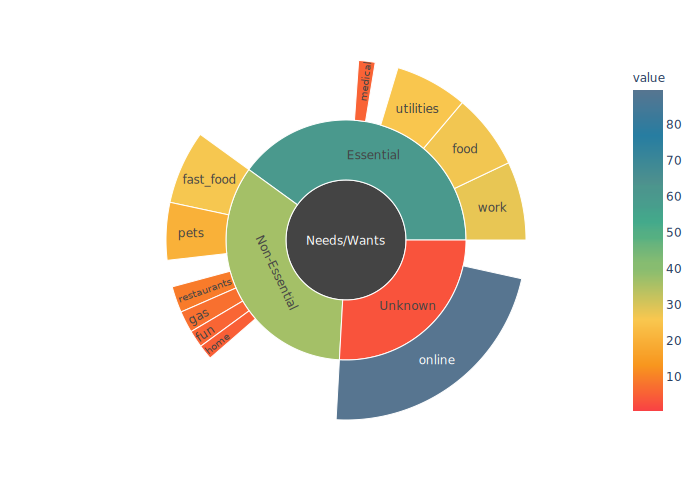

In [38]:
show_svg('sunburst')

----

---

In [39]:
# fig =px.sunburst(
#     data,
#     names='character',
#     parents='parent',
#     values='value',
#     title = 'Expenses'
# )
# fig.show()

In [40]:
inside = ['savings', 'savings', 'debt', 'housing', 'transportation', 'food', 'utilities', 'medical', 'education', 'childcare', 'personal']

outside = ['essential' for i in range(len(inside))]

# blues
# https://coolors.co/05668d-028090-00a896-02c39a-f0f3bd
# rainbow
# https://coolors.co/f94144-f3722c-f8961e-f9844a-f9c74f-90be6d-43aa8b-4d908e-577590-277da1

import random
def constrain_sum(n, total):
    # Return an randomly chosen list of n positive intergers summing to 100/total
    dividers = sorted(random.sample(range(1, total), n-1))
    return [a - b for a,b in zip(dividers + [total], [0]+dividers)]
nums = constrain_sum(len(inside), 100)

nums

import random
import plotly.express as px
data = dict(
    character= inside,
    parent = outside,
    value= nums)

fig =px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
    title = 'Expenses'
)
fig.show()

In [41]:
data = dict(
    character= inside,
    parent = outside,
    value= nums)

fig =px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
    title = 'Expenses'
)
fig.show()